# Project 2

Instructions

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?

Group (The DataDriven Team): Susanna Wong, Puja Roy, Mikhail Broomes & Marjete Vucinaj, Danny & Mohammed Rahman

Video : https://drive.google.com/file/d/1S9e1K5TDRr6f52v3iB6StbIGbLVf97WM/view?usp=sharing

In [ ]:
import csv
import pandas as pd
import requests
import io
import networkx as nx
import math
import community
import numpy as np
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
links = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/links.csv")
movies = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/movies.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/ratings.csv")
tags = pd.read_csv("https://raw.githubusercontent.com/MAB592/Data620/main/Assignments/Project%202/tags.csv")

In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
mov_rat = ratings.join(movies, on='movieId', how='inner', lsuffix='_ratings', rsuffix='_movies')

mov_rat_tag = mov_rat.join(tags, on='movieId', how='inner', rsuffix='_tags')

final_df = mov_rat_tag.join(links, on='movieId', how='inner', rsuffix='_links')

df = final_df

df.head()

,movieId,userId,movieId_ratings,rating,timestamp,movieId_movies,title,genres,userId_tags,movieId_tags,tag,timestamp_tags,movieId_links,imdbId,tmdbId
0,1,1,1,4.0,964982703,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
516,1,5,1,4.0,847434962,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
874,1,7,1,4.5,1106635946,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
1434,1,15,1,2.5,1510577970,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0
1667,1,17,1,4.5,1305696483,2,Jumanji (1995),Adventure|Children|Fantasy,2,60756,Highly quotable,1445714996,2,113497,8844.0


In [ ]:
G = nx.Graph()
G.add_nodes_from(df['userId'].unique(), bipartite=0)
G.add_nodes_from(df['movieId'].unique(), bipartite=1)

In [ ]:
edges = [(row['userId'], row['movieId']) for idx, row in df.iterrows()]
G.add_edges_from(edges)

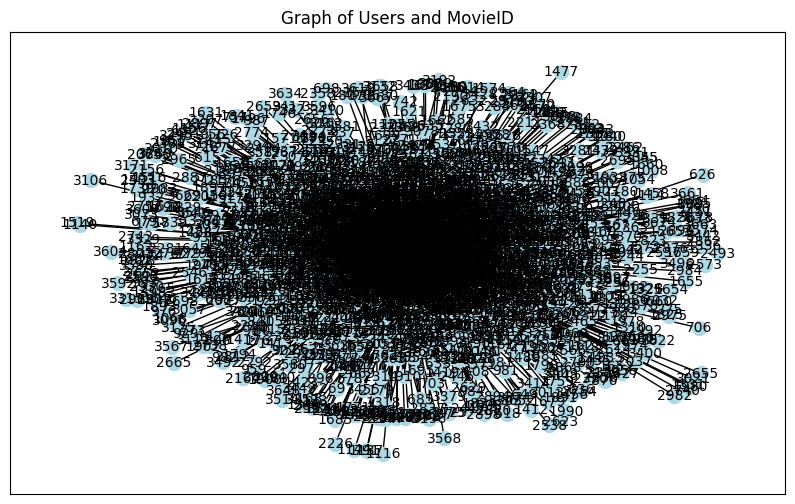

In [ ]:
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', node_size=100, font_size=10)
plt.title('Graph of Users and MovieID')
plt.show()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


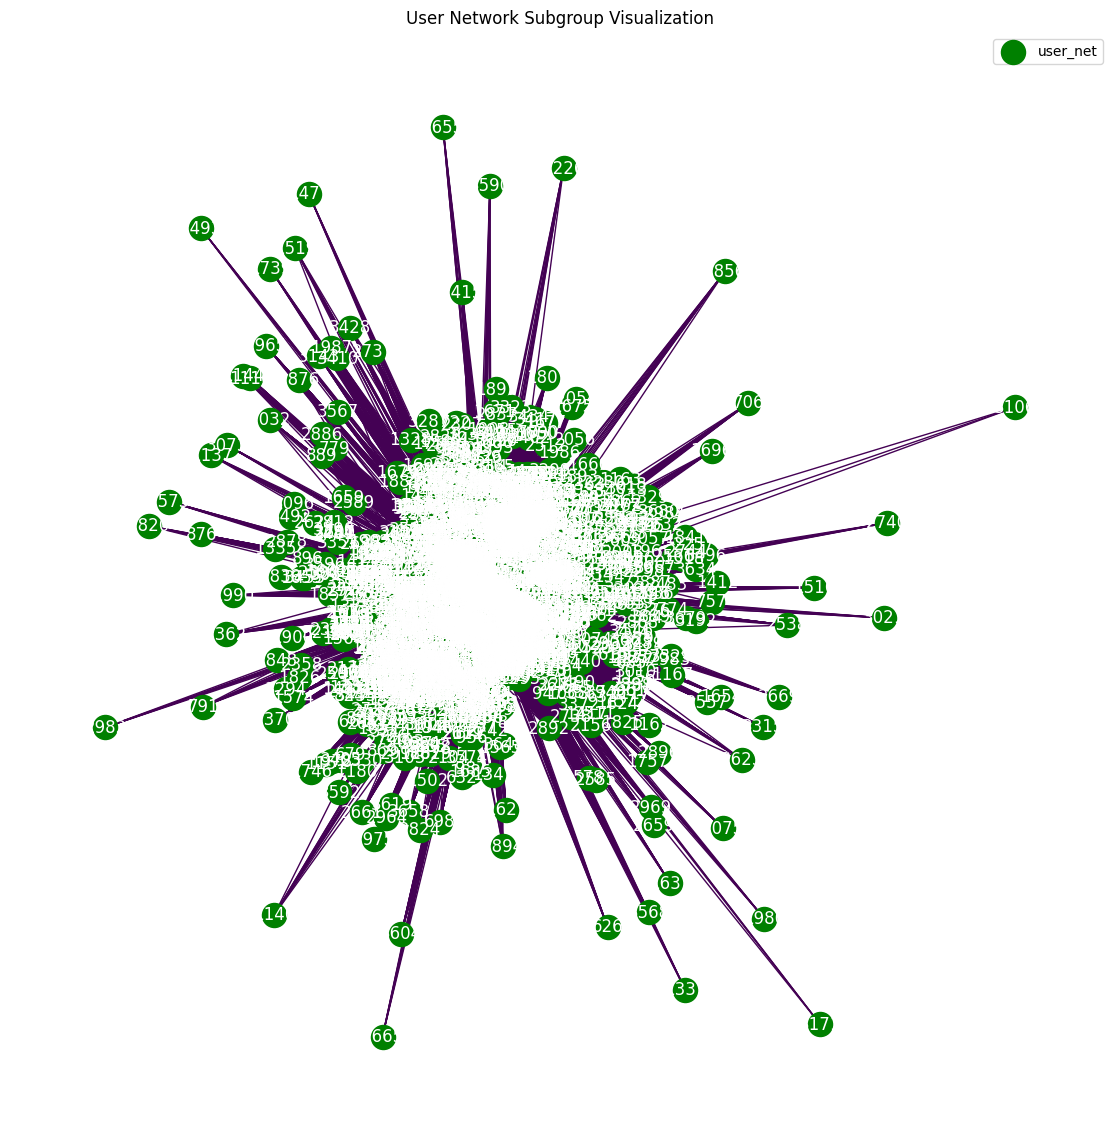

In [ ]:
user_net = nx.bipartite.weighted_projected_graph(G, df['userId'].unique())

# Get the largest connected component of the user network
largest_component = max(nx.connected_components(user_net), key=len)
user_net = user_net.subgraph(largest_component).copy()

# Calculate logarithm of edge weights for visualization
weights = [math.log(edata['weight']) for u, v, edata in user_net.edges(data=True)]

# Plotting the user network
plt.figure(figsize=(11, 11))
pos = nx.spring_layout(user_net)  # Layout algorithm for node positioning
nx.draw(user_net, pos, node_color='g', with_labels=True, node_size=300, font_color='w', edge_color=weights, cmap=plt.cm.Blues)
plt.title('User Network Subgroup Visualization')
plt.legend(["user_net"])
plt.show()

In [ ]:
len(user_net)

2828

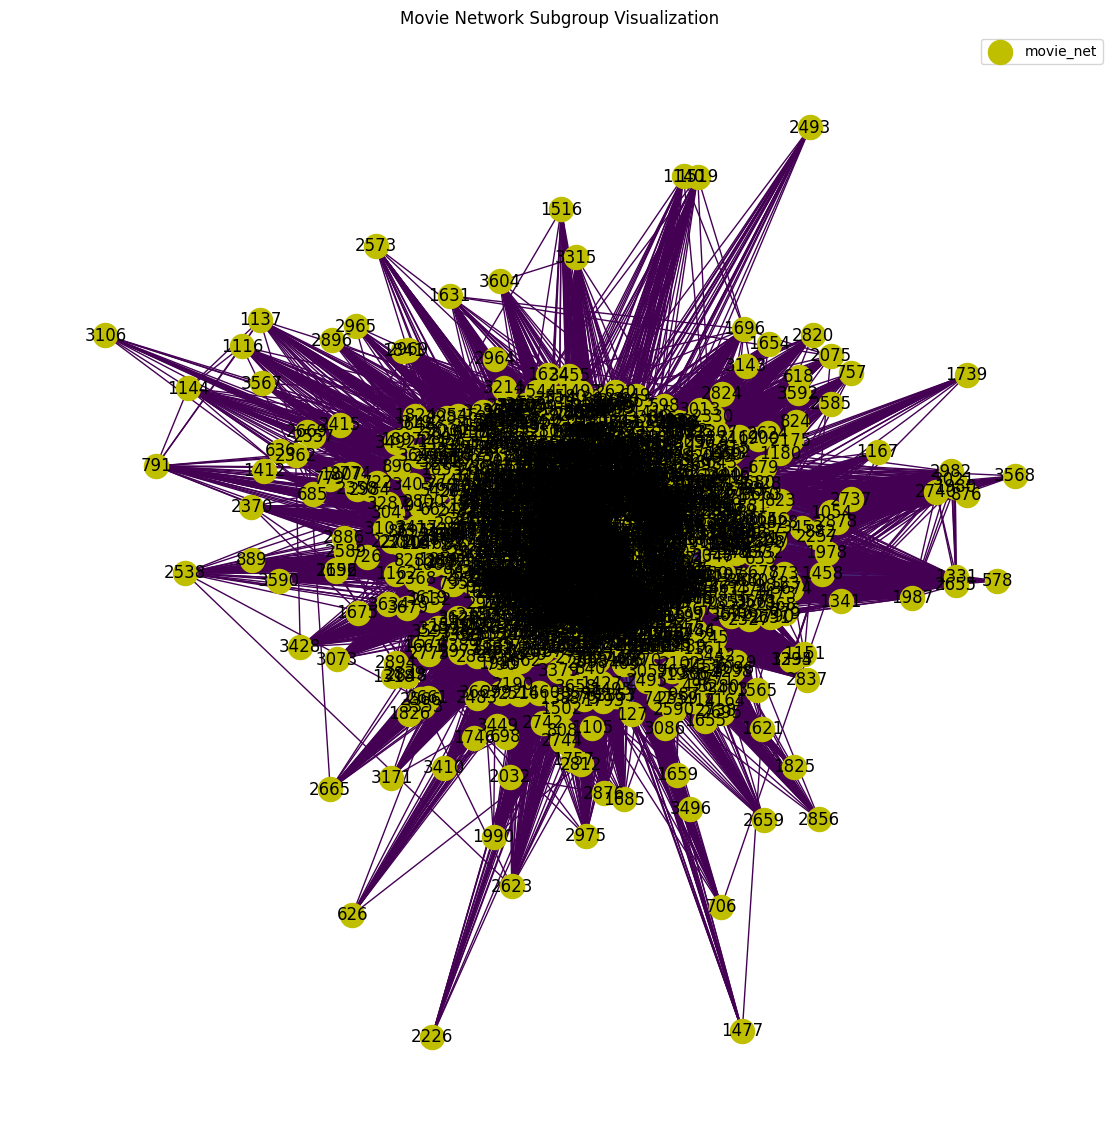

In [ ]:
movie_net = nx.bipartite.weighted_projected_graph(G, df['movieId'].unique())

# Get the largest connected component of the movie network
largest_component = max(nx.connected_components(movie_net), key=len)
movie_net = movie_net.subgraph(largest_component).copy()

# Calculate logarithm of edge weights for visualization
weights = [math.log(edata['weight']) for u, v, edata in movie_net.edges(data=True)]

# Plotting the movie network
plt.figure(figsize=(11, 11))
pos = nx.spring_layout(movie_net)  # Layout algorithm for node positioning
nx.draw(movie_net, pos, node_color='y', with_labels=True, node_size=300, font_color='k', edge_color=weights, cmap=plt.cm.Blues)
plt.title('Movie Network Subgroup Visualization')
plt.legend(["movie_net"])
plt.show()





In [ ]:
len(movie_net)

2828

In [ ]:
def trim_edges(g, weight=1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight']> weight:
            g2.add_edge(f,to,**edata)
    return g2

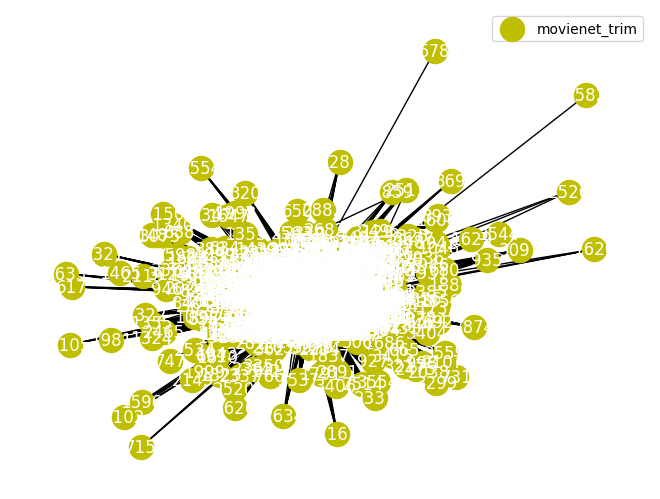

In [ ]:
movienet_trim = trim_edges(movie_net, weight=math.exp(0.99))
weights = [edata['weight'] for f,t,edata in movienet_trim.edges(data=True)]

nx.draw_spring(movienet_trim, label = 'movienet_trim', node_color='y',with_labels=True,node_size =300,font_color ='w')
plt.legend(["movienet_trim"])
plt.show()

In [ ]:
len(movienet_trim)

2286

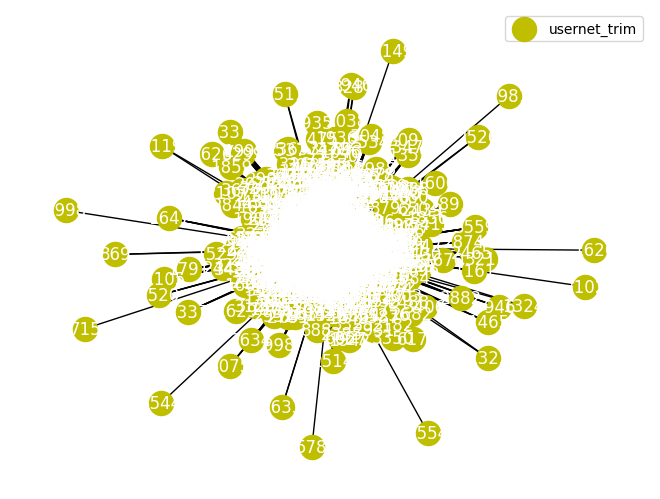

In [ ]:
usernet_trim = trim_edges(user_net, weight=math.exp(0.99))
weights = [edata['weight'] for f,t,edata in usernet_trim.edges(data=True)]

nx.draw_spring(usernet_trim, label = 'usernet_trim', node_color='y',with_labels=True,node_size =300,font_color ='w')
plt.legend(["usernet_trim"])
plt.show()

In [ ]:
len(usernet_trim)

2281

In [ ]:
weights= [edata['weight'] for f,to,edata in movienet_trim.edges(data=True)]
mn = int(min(weights))
mx = int(max(weights))

In [ ]:
def island_method(movienet_trim, iterations=10):
    step =((mx - mn)/iterations)
    return [[threshold, trim_edges(movienet_trim, threshold)] for threshold in np.arange(mn,mx,step)]

Are the graphs directed?

In [ ]:
user_ud = usernet_trim.to_undirected()
fb_components = nx.connected_components(user_ud)
nx.is_directed(user_ud)

False

In [ ]:
movie_ud = movienet_trim.to_undirected()
fb_components = nx.connected_components(movie_ud)
nx.is_directed(movie_ud)

False

Looking at Centrality between the groups

In [ ]:
def sorted_map(map):
    ms = sorted(map.items(), key=lambda x: (-x[1], x[0]))
    return ms

In [ ]:
# Degree Centrality for users
dcent = nx.degree_centrality(user_ud)
dcent_s = sorted(dcent.items(), key=lambda item: item[1], reverse=True)
print(dcent_s[:5])

[(260, 0.9596491228070175), (356, 0.9565789473684211), (608, 0.9508771929824562), (1, 0.9372807017543859), (296, 0.9364035087719298)]


In [ ]:
# Degree Centrality for movieID
dcent2 = nx.degree_centrality(user_ud)
dcent_s2 = sorted(dcent.items(), key=lambda item: item[1], reverse=True)
print(dcent_s2[:5])

Closeness Centrality

In [ ]:
# Closeness Centrality for users
ccent = nx.closeness_centrality(user_ud)
ccent_s = sorted(ccent.items(), key=lambda item: item[1], reverse=True)
print(ccent_s[:5])

[(260, 0.9612141652613828), (356, 0.9583858764186634), (608, 0.9531772575250836), (1, 0.94098225340487), (296, 0.9402061855670103)]


In [ ]:
# Closeness Centrality for MovieID
ccent2 = nx.closeness_centrality(movie_ud)
ccent_s2 = sorted(ccent.items(), key=lambda item: item[1], reverse=True)
print(ccent_s2[:5])

Betweenness Centrality

In [ ]:
# Betweenness Centrality for Users
bcent = nx.betweenness_centrality(user_ud)
bcent_s = sorted(bcent.items(), key=lambda item: item[1], reverse=True)
print(bcent_s[:5])

In [ ]:
# Betweenness Centrality for Movies
bcent2 = nx.betweenness_centrality(movie_ud)
bcent_s2 = sorted(bcent.items(), key=lambda item: item[1], reverse=True)
print(bcent_s2[:5])

These additions would explicitly address the questions about dataset selection, network size reduction, and inference about distinct groups within the network. They enhance the analysis by adding community detection and deeper exploration of centrality measures within identified groups.